# 素数判定あれこれ

In [47]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from tqdm import tqdm_notebook as tqdm
from decimal import *
getcontext()
from functools import reduce
import random

## 素朴な素数判定

In [2]:
def is_prime(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
            return False
            break
    else: return True

In [25]:
def fermat(num):
    num = abs(num)
    if num == 2:
        return True
    elif num < 2 or num%2 == 0:
        return False
    else:
        return pow(2, num-1, num) == 1

In [84]:
fermat((2**20)*13+1)

True

In [91]:
def miller_rabin(k,init):
    num = (2**k)*init+1
    a = random.randrange(num-2)+1
    if pow(a, init, num) ==1: #(a**init)%num == 1:
        return True
    else:
        for r in range(k):
            b = (2**r)*init
            if pow(a, b, num) == num-1: #(a**b)%num == num-1:
                return True
                break
        else: 
            return False

In [92]:
k=20
init=13
num = (2**k)*init+1
print(num)

print(miller_rabin(k,init),is_prime(num))

13631489
True True


In [ ]:
init=13
%timeit [is_prime((2**k)*init+1) for k in range(1,100)]
%timeit [fermat((2**k)*init+1) for k in range(1,100)]
%timeit [miller_rabin(k,init) for k in range(1,100)]

# 大竹先生の問題

In [3]:
init = 2*80-1
N = 10**2

count=0
num = init
while not is_prime(num+1):
    count += 1
    if count > N:
        print("Count Limit")
        break
    num *= 2
else:
    print("{}=2^{}*{}+1".format(num+1, count, init))

10177=2^6*159+1


In [37]:
def get_k(odd, Limit = 10**3):
    count = 0
    num = odd
    while not fermat(num+1): #is_prime(num+1):
        count += 1
        if count > Limit:
            return -1
            break
        num *= 2
    else:
        return count

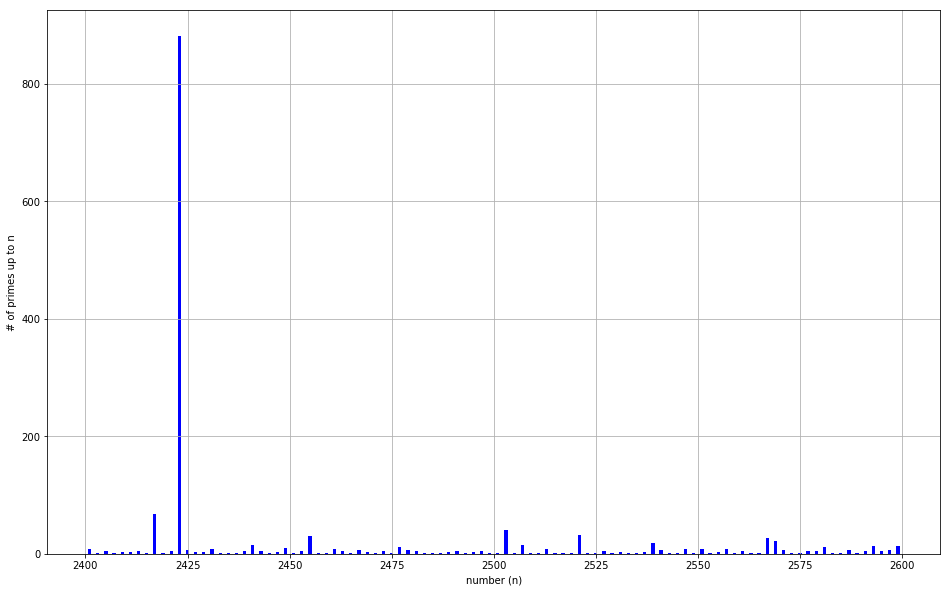

In [45]:
X = [2*k-1 for k in range(1,10**4)][1200:1300]
Y = [get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()